In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
matplotlib.matplotlib_fname()
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('path/daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [3]:
ar_df= df.copy()

In [4]:
df["Date"].dtype

dtype('<M8[ns]')

In [5]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [6]:
df_ann=df.copy()

In [7]:
df.isna().sum()

Date    0
Temp    0
dtype: int64

In [8]:
d_ind=df.copy()

In [9]:
d_ind['Date'].dtype

dtype('<M8[ns]')

In [10]:
d_ind.index= d_ind['Date']

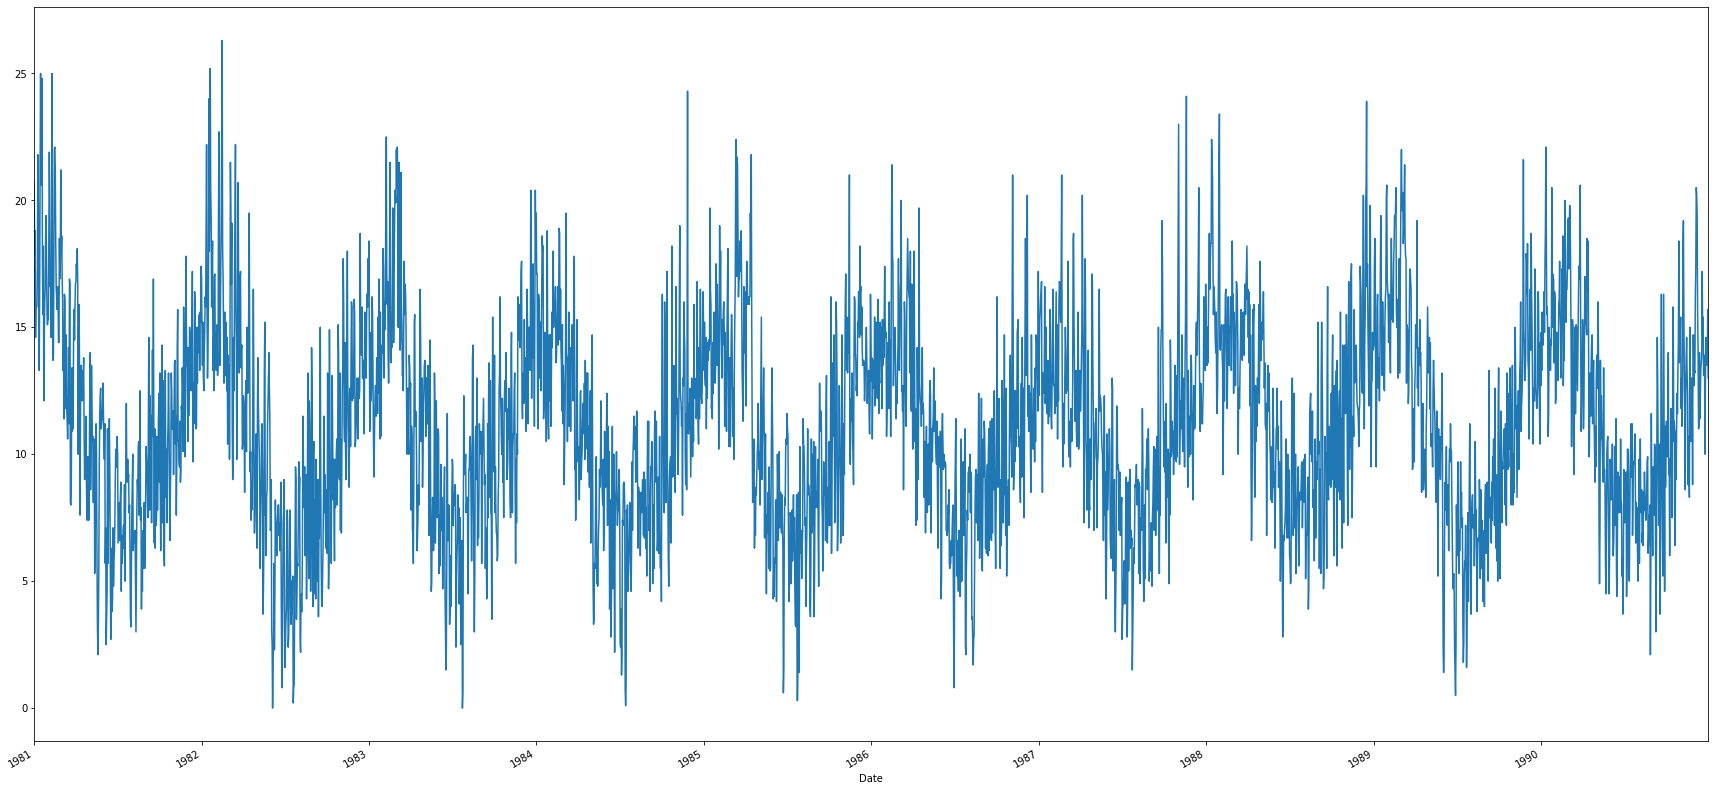

In [11]:
plt.figure(figsize=(30,15))
d_ind["Temp"].plot()

Zooming in

In [12]:
d1981=d_ind[(d_ind['Date'] > '1981-01-01') & (d_ind['Date'] <= '1982-01-01')]

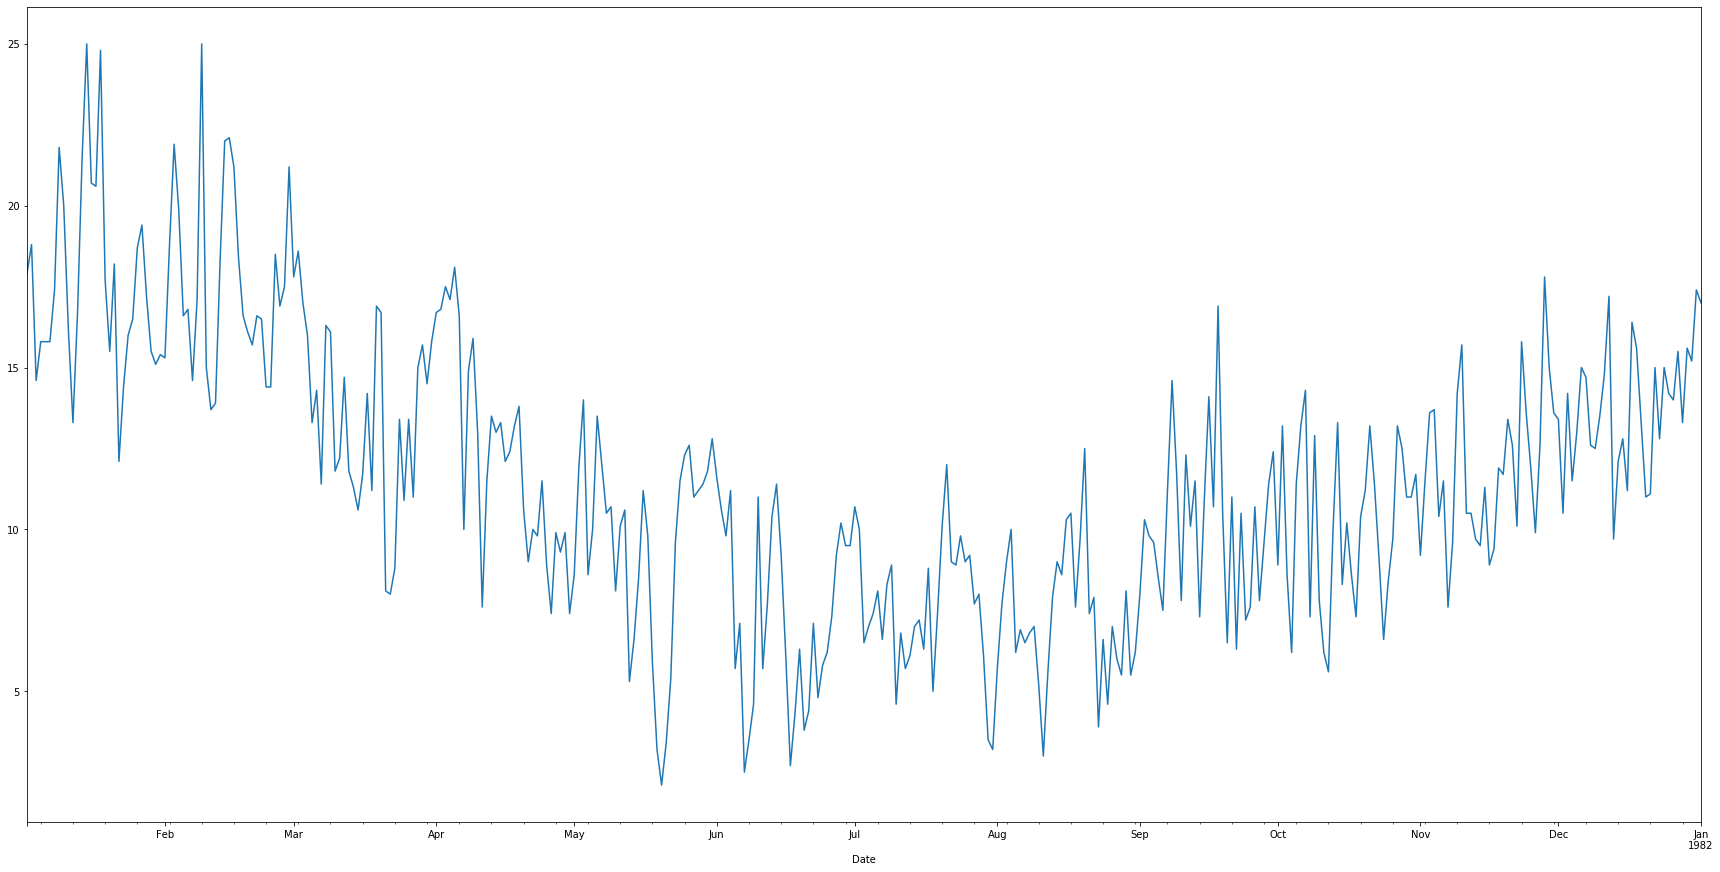

In [13]:
plt.figure(figsize=(30,15))
d1981["Temp"].plot()

In [14]:
d81to83=d_ind[(d_ind['Date'] > '1981-01-01') & (d_ind['Date'] <= '1983-01-01')]

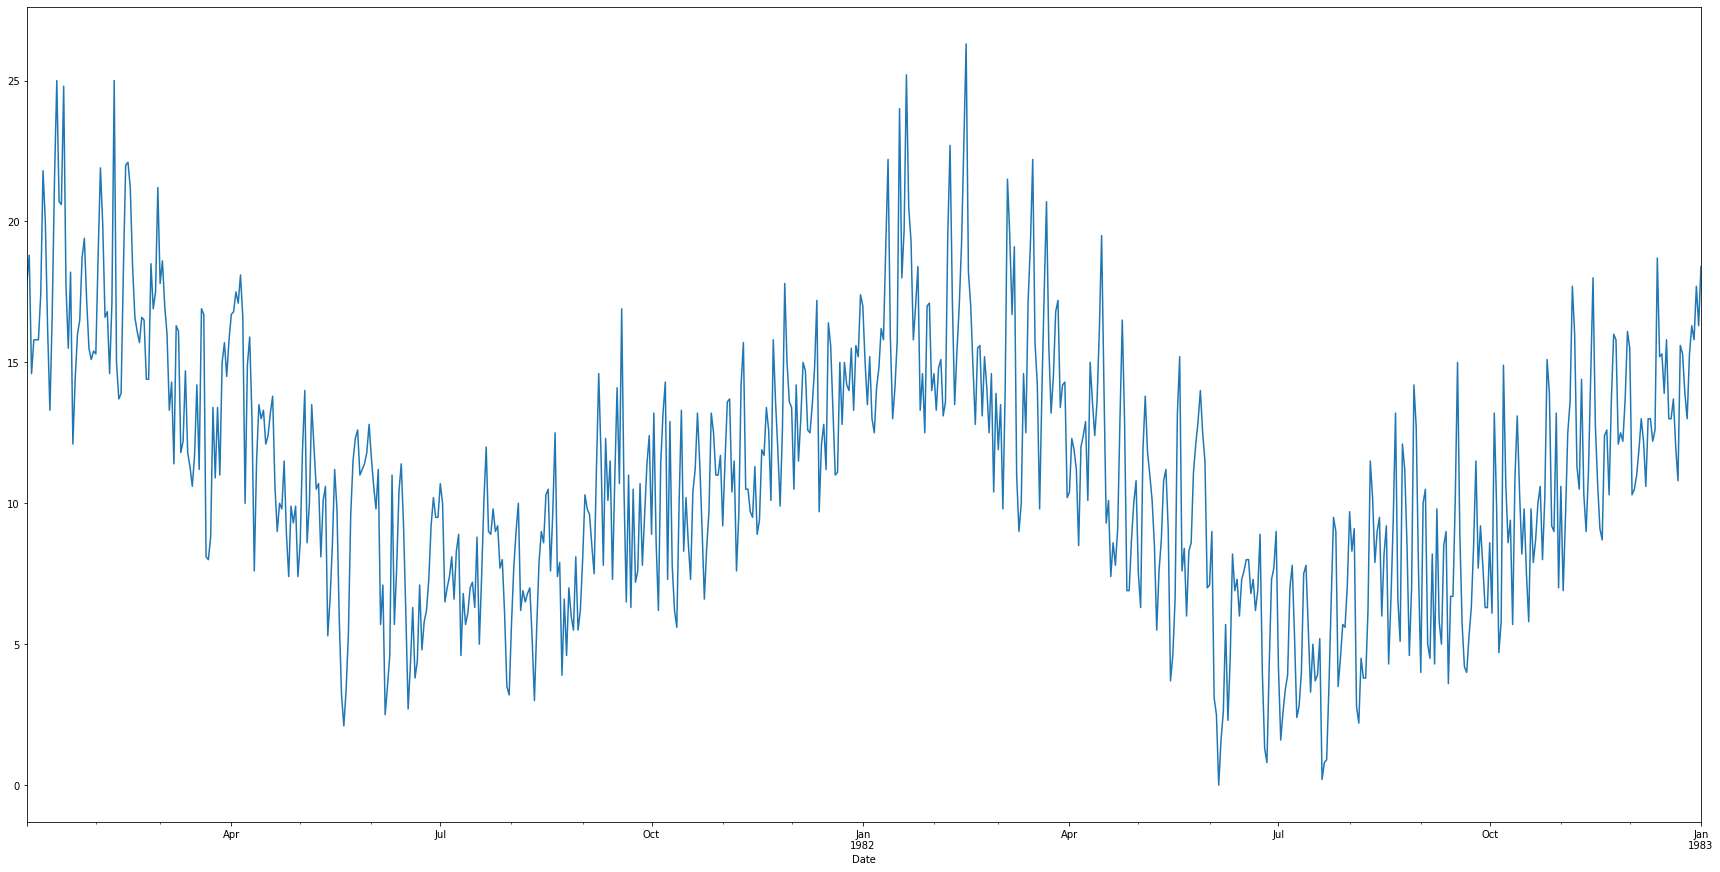

In [15]:
plt.figure(figsize=(30,15))
d81to83["Temp"].plot()

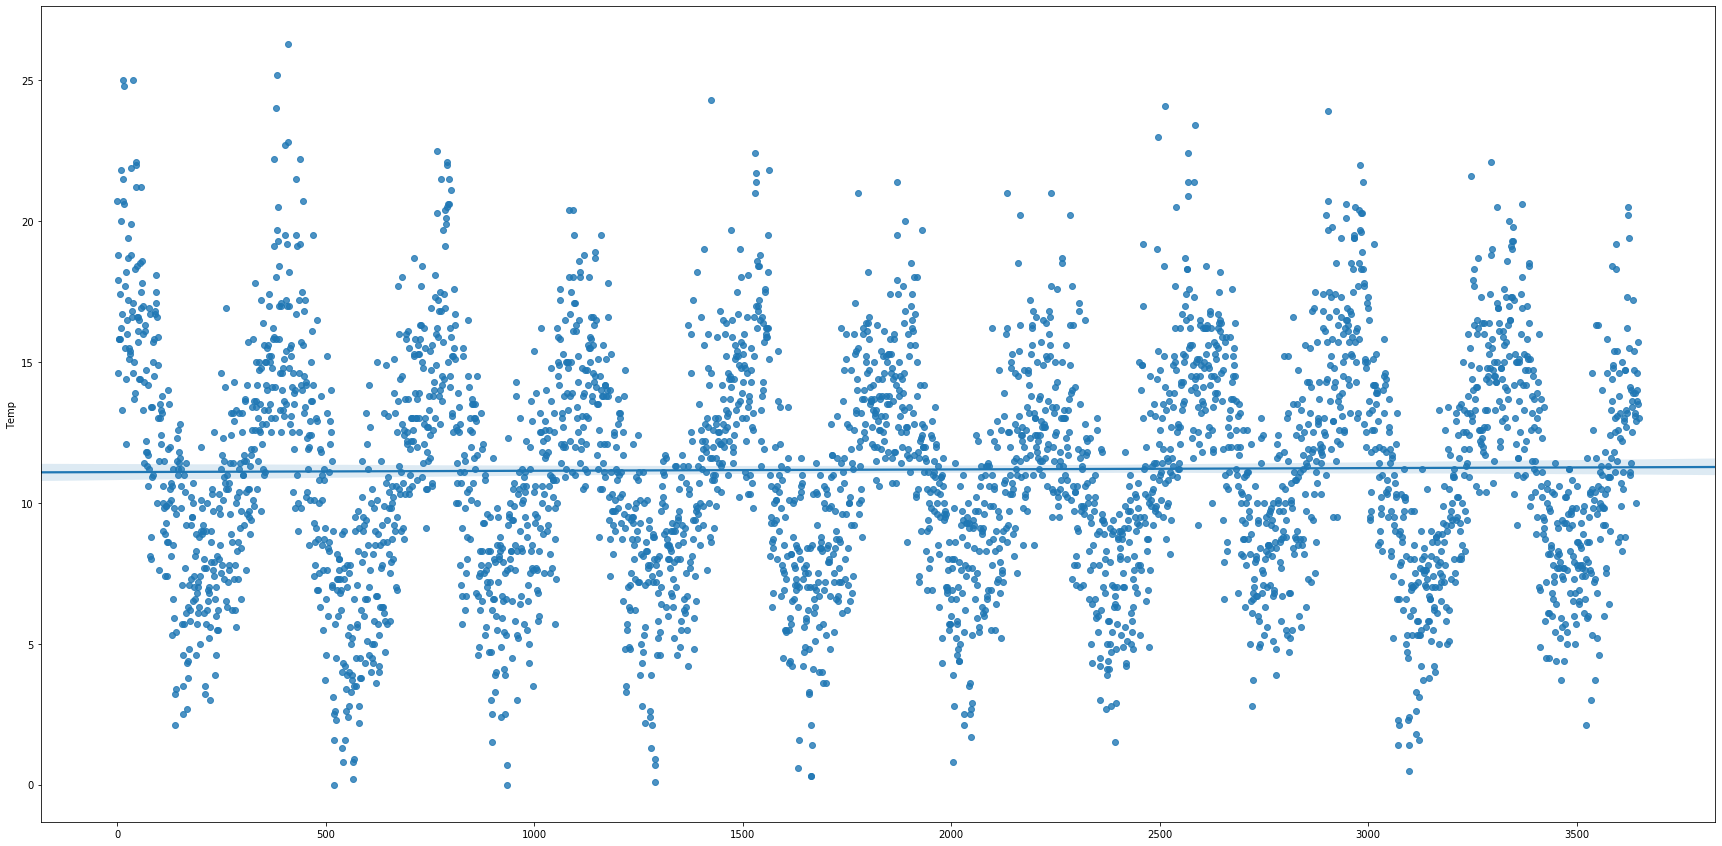

In [16]:
plt.figure(figsize=(30,15))
sns.regplot(x= df.index.values, y=df['Temp'])

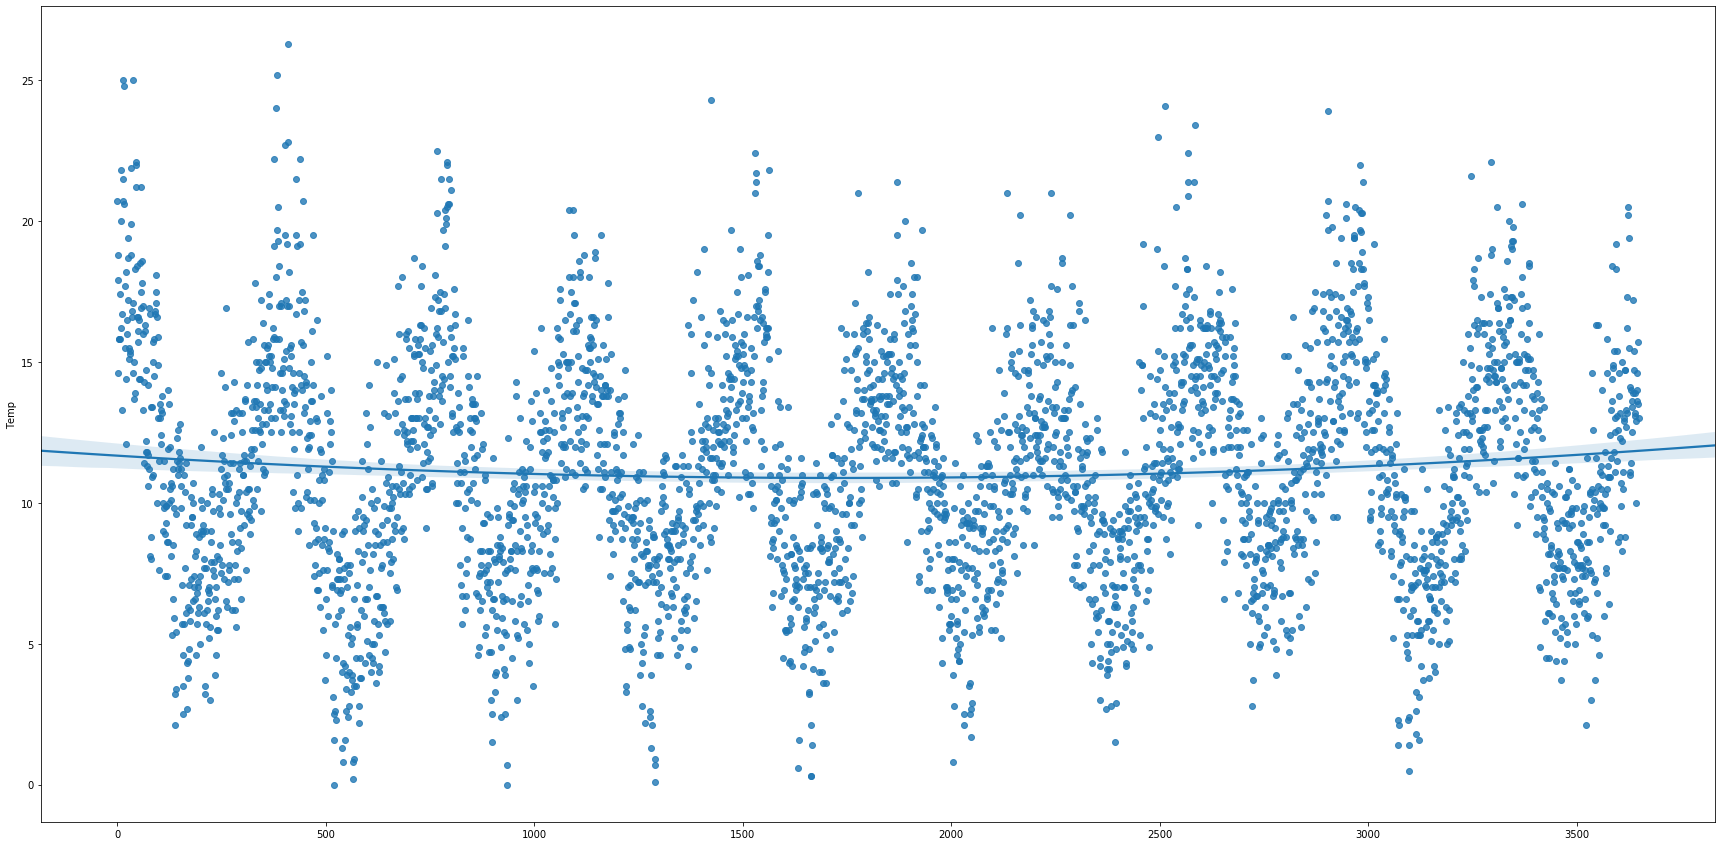

In [17]:
plt.figure(figsize=(30,15))
sns.regplot(x= df.index.values, y=d_ind['Temp'], order=2)

/Users/pujasonawane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


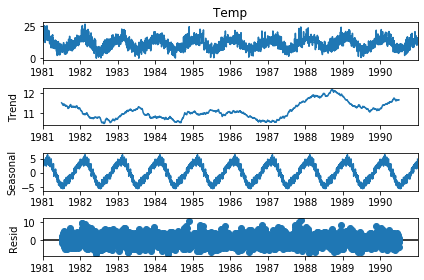

<Figure size 2160x1080 with 0 Axes>

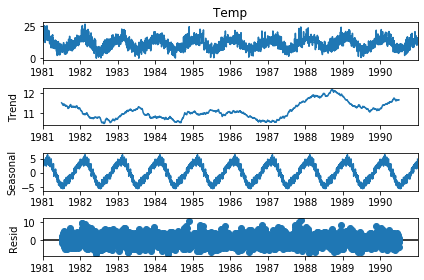

In [18]:
result_a = seasonal_decompose(d_ind['Temp'], model='additive', freq=365)
plt.figure(figsize=(30,15))
result_a.plot()

In [73]:
#autocorrelation_plot(df['Temp'])

naive forecasting

In [19]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [20]:
df['t'] =  df['Temp'].shift(1)

In [21]:
df_lag1= df

In [22]:
df_lag1

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5


In [23]:
#split data
train= df.iloc[1:2190,]
test= df.iloc[2190:]

In [24]:
train_x, train_y = train['t'], train['Temp']
test_x, test_y = test['t'], test['Temp']

In [25]:
test_y

2190    12.3
2191    13.8
2192    15.3
2193    15.6
2194    16.2
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 1460, dtype: float64

In [26]:
predictions=test_x.copy()
predictions

2190    17.2
2191    12.3
2192    13.8
2193    15.3
2194    15.6
        ... 
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, Length: 1460, dtype: float64

In [27]:
mae = mean_absolute_error(test_y, predictions)
mae

2.0254794520547943

Text(0, 0.5, 'Temperature')

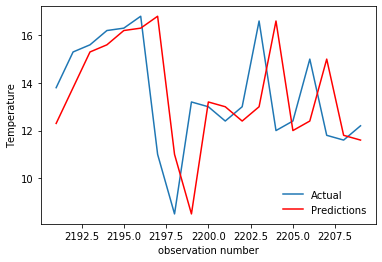

In [28]:
pyplot.plot(test_y.iloc[1:20], label="Actual")
pyplot.plot(predictions.iloc[1:20], color="red",label="Predictions")
pyplot.legend(loc='lower right', frameon=False)
pyplot.xlabel('observation number')
pyplot.ylabel('Temperature')


detrending, deseasoning

In [29]:
df_112=df.copy()
#.iloc[]

In [30]:
df_112['lag1Temp'] = df_112['Temp'].diff(periods=1)

In [31]:
#miles_df.index = miles_df['Month'] 
df_112.index=df_112['Date']


In [32]:
df_112['Date'].dtype
#df.iloc[1:,2]

dtype('<M8[ns]')

In [33]:
df_112["Temp"].dtype

dtype('float64')

/Users/pujasonawane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


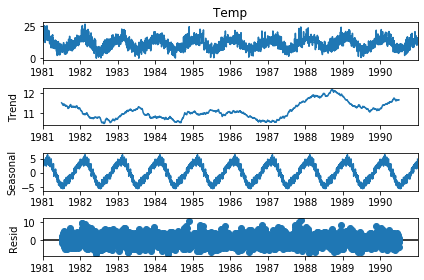

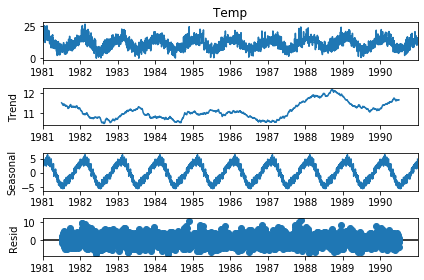

In [34]:
result_a = seasonal_decompose(df_112['Temp'], model='additive', freq=365)
result_a.plot()

In [35]:
df_112['lag12Temp'] = df_112['lag1Temp'].diff(periods=365)

In [36]:
df_112.head(370)

,Date,Temp,t,lag1Temp,lag12Temp
Date,,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN,NaN
1981-01-02,1981-01-02,17.9,20.7,-2.8,NaN
1981-01-03,1981-01-03,18.8,17.9,0.9,NaN
1981-01-04,1981-01-04,14.6,18.8,-4.2,NaN
1981-01-05,1981-01-05,15.8,14.6,1.2,NaN
...,...,...,...,...,...
1982-01-01,1982-01-01,17.0,17.4,-0.4,NaN
1982-01-02,1982-01-02,15.0,17.0,-2.0,0.8
1982-01-03,1982-01-03,13.5,15.0,-1.5,-2.4


Autoregression Model

In [37]:
from statsmodels.tsa.ar_model import AR

In [38]:
ar_df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [39]:
df_112

,Date,Temp,t,lag1Temp,lag12Temp
Date,,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN,NaN
1981-01-02,1981-01-02,17.9,20.7,-2.8,NaN
1981-01-03,1981-01-03,18.8,17.9,0.9,NaN
1981-01-04,1981-01-04,14.6,18.8,-4.2,NaN
1981-01-05,1981-01-05,15.8,14.6,1.2,NaN
...,...,...,...,...,...
1990-12-27,1990-12-27,14.0,14.6,-0.6,2.1
1990-12-28,1990-12-28,13.6,14.0,-0.4,1.2
1990-12-29,1990-12-29,13.5,13.6,-0.1,1.2


In [40]:
df_112.isna().sum()

Date           0
Temp           0
t              1
lag1Temp       1
lag12Temp    366
dtype: int64

In [41]:
df_112.dropna()

,Date,Temp,t,lag1Temp,lag12Temp
Date,,,,,
1982-01-02,1982-01-02,15.0,17.0,-2.0,0.8
1982-01-03,1982-01-03,13.5,15.0,-1.5,-2.4
1982-01-04,1982-01-04,15.2,13.5,1.7,5.9
1982-01-05,1982-01-05,13.0,15.2,-2.2,-3.4
1982-01-06,1982-01-06,12.5,13.0,-0.5,-0.5
...,...,...,...,...,...
1990-12-27,1990-12-27,14.0,14.6,-0.6,2.1
1990-12-28,1990-12-28,13.6,14.0,-0.4,1.2
1990-12-29,1990-12-29,13.5,13.6,-0.1,1.2


In [43]:
df_112.reset_index(drop=True,inplace=True)

In [44]:
df_112

,Date,Temp,t,lag1Temp,lag12Temp
0,1981-01-01,20.7,NaN,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8,NaN
2,1981-01-03,18.8,17.9,0.9,NaN
3,1981-01-04,14.6,18.8,-4.2,NaN
4,1981-01-05,15.8,14.6,1.2,NaN
...,...,...,...,...,...
3645,1990-12-27,14.0,14.6,-0.6,2.1
3646,1990-12-28,13.6,14.0,-0.4,1.2
3647,1990-12-29,13.5,13.6,-0.1,1.2
3648,1990-12-30,15.7,13.5,2.2,-1.8


In [45]:
train_, test_ = df_112.lag12Temp[1:df_112.shape[0]-657], df_112.lag12Temp[df_112.shape[0]-657:]

In [46]:
test_

2993    0.0
2994   -1.8
2995   -3.9
2996   -0.7
2997    2.9
       ... 
3645    2.1
3646    1.2
3647    1.2
3648   -1.8
3649   -1.0
Name: lag12Temp, Length: 657, dtype: float64

In [47]:
train_ar, test_ar =df_112.Temp[1:df_112.shape[0]-729],df_112.Temp[df_112.shape[0]-729:]

In [48]:
train_ar

1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
2916    12.9
2917    12.9
2918    14.8
2919    14.1
2920    14.3
Name: Temp, Length: 2920, dtype: float64

In [49]:
test_ar

2921    17.4
2922    18.5
2923    16.8
2924    11.5
2925     9.5
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 729, dtype: float64

In [50]:
data = train_ar

predict =[]
for t in test_ar:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train_ar)+len(test_ar)-1)
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_D

In [52]:
mae_ar = mean_absolute_error(test_ar.values, predict)
mae_ar

1.7420383569162532

Text(0, 0.5, 'Temperature')

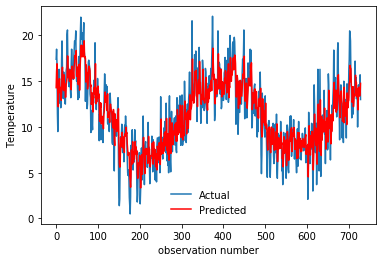

In [53]:
pyplot.plot(test_ar.values, label="Actual")
pyplot.plot(predict, color='red', label="Predicted")
pyplot.legend(loc='lower center', frameon=False)
pyplot.xlabel('observation number')
pyplot.ylabel('Temperature')

Moving average Model

In [54]:
df_ma=df_lag1.copy()
df_ma

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5


In [55]:
df_ma['residual'] = df_ma['Temp'] - df_ma['t']

In [56]:
df_ma

,Date,Temp,t,residual
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2
...,...,...,...,...
3645,1990-12-27,14.0,14.6,-0.6
3646,1990-12-28,13.6,14.0,-0.4
3647,1990-12-29,13.5,13.6,-0.1
3648,1990-12-30,15.7,13.5,2.2


In [57]:
train_ma, test_ma = df_ma.residual[1:df_ma.shape[0]-730], df_ma.residual[df_ma.shape[0]-730:]

In [58]:
#train_ma
test_yma= df_ma.Temp[df_ma.shape[0]-730:]


In [59]:
test_yma

2920    14.3
2921    17.4
2922    18.5
2923    16.8
2924    11.5
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 730, dtype: float64

In [60]:
#model_ma = AR(train_ma)
#model_fit_ma = model_ma.fit()

In [61]:
data = train_ma
predict_ma =[]
for t in test_ma:
    model_ma = AR(data)
    model_fit_ma = model_ma.fit()
    y = model_fit_ma.predict(start=len(data), end=len(train_ma)+len(test_ma)-1)
    predict_ma.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_D

In [62]:
model_fit_ma.k_ar

29

In [64]:
df_ma.t[df_ma.shape[0]-730:]

2920    14.1
2921    14.3
2922    17.4
2923    18.5
2924    16.8
        ... 
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, Length: 730, dtype: float64

In [65]:
final_pred= df_ma.t[df_ma.shape[0]-730:]+predict_ma

In [68]:
mae_ma = mean_absolute_error(test_yma, final_pred)
mae_ma

1.745427925110435

Text(0, 0.5, 'Temperature')

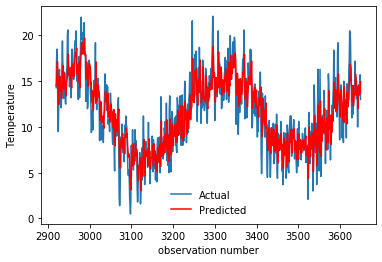

In [69]:
pyplot.plot(test_yma, label="Actual")
pyplot.plot(final_pred, color='red', label="Predicted")
pyplot.legend(loc='lower center', frameon=False)
pyplot.xlabel('observation number')
pyplot.ylabel('Temperature')

ARIMA

In [70]:
df_arima= df.copy()

In [71]:
df_arima['lag365']= df_arima['Temp'].diff(365)


In [72]:
df_arima['lag365'].isna().sum()

365

In [73]:
df_arima

,Date,Temp,t,lag365
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,NaN
2,1981-01-03,18.8,17.9,NaN
3,1981-01-04,14.6,18.8,NaN
4,1981-01-05,15.8,14.6,NaN
...,...,...,...,...
3645,1990-12-27,14.0,14.6,0.7
3646,1990-12-28,13.6,14.0,1.9
3647,1990-12-29,13.5,13.6,3.1
3648,1990-12-30,15.7,13.5,1.3


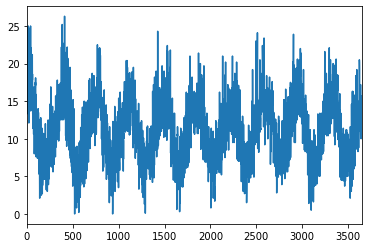

In [74]:
df_arima['Temp'].plot()
#linear trend
#D=1

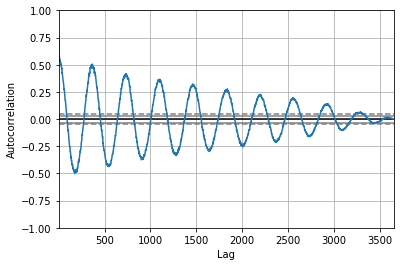

In [75]:
autocorrelation_plot(df_arima['Temp'])
#q=70

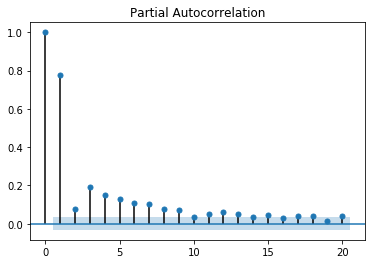

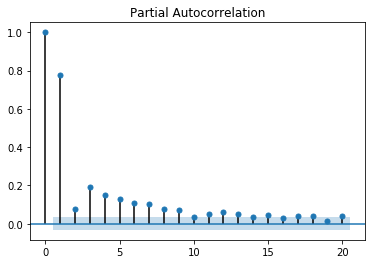

In [76]:
plot_pacf(df_arima['Temp'], lags=20)
#p=9

In [77]:
train_size = int(df_arima.shape[0]*0.9)

In [78]:
train_arima, test_arima = df_arima.Temp[0:train_size], df_arima.Temp[train_size:]

In [64]:
"""
Walk forward validation- takes a lot of time
data = train_arima
predict_arima =[]
for t in test_arima:
    #model_arima = ARIMA(data, order=(9,1,10))
    try:
        m_arima = ARIMA(df_arima['Temp'], order=(9,1,10)).fit()
    except:
        m_arima = ARIMA(df_arima['Temp'], order=(9,1,10)).fit(start_params=[1,.1,.1,.1])
    
    #model_fit = model_arima.fit()
    y = m_arima.forecast()
    print(y[0][0])
    predict_arima.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)
    
"""

"\ndata = train_arima\npredict_arima =[]\nfor t in test_arima:\n    #model_arima = ARIMA(data, order=(9,1,10))\n    try:\n        m_arima = ARIMA(df_arima['Temp'], order=(9,1,10)).fit()\n    except:\n        m_arima = ARIMA(df_arima['Temp'], order=(9,1,10)).fit(start_params=[1,.1,.1,.1])\n    \n    #model_fit = model_arima.fit()\n    y = m_arima.forecast()\n    print(y[0][0])\n    predict_arima.append(y[0][0])\n    data = np.append(data, t)\n    data = pd.Series(data)\n    \n"

In [80]:
try:
    m_arima = ARIMA(df_arima['Temp'], order=(9,1,10)).fit()
except:
     m_arima = ARIMA(df_arima['Temp'], order=(9,1,10)).fit(start_params=[1,.1,.1,.1])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [81]:
m_arima.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Temp   No. Observations:                 3649
Model:                ARIMA(9, 1, 10)   Log Likelihood               -8378.730
Method:                       css-mle   S.D. of innovations              2.401
Date:                Sat, 11 Jul 2020   AIC                          16799.460
Time:                        17:34:30   BIC                          16929.706
Sample:                             1   HQIC                         16845.845
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0013      0.006     -0.208      0.835      -0.013       0.011
ar.L1.D.Temp     -0.4915      0.236     -2.082      0.037      -0.954      -0.029
ar.L2.D.Temp     -0.0739      0.063     -1.176      0.240      -0.197       0.049
ar.L3.D.Temp     -0.4885      0.115     -4.266      0.000      -0.713      -0.264
ar.L4.D.Temp     -0.2461      0.072     -3.401      0.001      -0.388      -0.104
ar.L5.D.Temp     -0.3514      0.052     -6.802      0.000      -0.453      -0.250
ar.L6.D.Temp      0.0882      0.036      2.479      0.013       0.018       0.158
ar.L7.D.Temp     -0.7032      0.083     -8.521      0.000      -0.865      -0.541
ar.L8.D.Temp     -0.5646      0.180     -3.140      0.002      -0.917      -0.212
ar.L9.D.Temp      0.2506      0.060      4.171      0.000       0.133       0.368
ma.L1.D.Temp      0.0851      0.236      0.361      0.718      -0.377       0.547
ma.L2.D.Temp     -0.4486      0.135     -3.312      0.001      -0.714      -0.183
ma.L3.D.Temp      0.2030      0.048      4.244      0.000       0.109       0.297
ma.L4.D.Temp     -0.0476      0.018     -2.592      0.010      -0.084      -0.012
ma.L5.D.Temp      0.0779      0.011      7.306      0.000       0.057       0.099
ma.L6.D.Temp     -0.3590        nan        nan        nan         nan         nan
ma.L7.D.Temp      0.6094      0.116      5.272      0.000       0.383       0.836
ma.L8.D.Temp      0.2779      0.211      1.316      0.188      -0.136       0.692
ma.L9.D.Temp     -0.7057      0.083     -8.462      0.000      -0.869      -0.542
ma.L10.D.Temp    -0.1406      0.043     -3.248      0.001      -0.225      -0.056
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.5456           -0.8407j            1.0023           -0.3416
AR.2            -0.5456           +0.8407j            1.0023            0.3416
AR.3            -1.0103           -0.0000j            1.0103           -0.5000
AR.4            -1.1278           -0.0000j            1.1278           -0.5000
AR.5             0.2809           -0.9598j            1.0001           -0.2047
AR.6             0.2809           +0.9598j            1.0001            0.2047
AR.7             0.8774           -0.5756j            1.0493           -0.0924
AR.8             0.8774           +0.5756j            1.0493            0.0924
AR.9             3.1660           -0.0000j            3.1660           -0.0000
MA.1             1.0995           -0.0000j            1.0995           -0.0000
MA.2             0.8798           -0.5663j            1.0463           -0.0910
MA.3             0.8798           +0.5663j            1.0463            0.0910
MA.4             0.2815           -0.9597j            1.0001           -0.2046
MA.5        

In [82]:
output = m_arima.forecast(len(test_arima))

In [83]:
pred = output[0]
#forcast then standard deviation and then 95% confidence interval 

In [84]:
mae_arima = mean_absolute_error(test_arima,pred)
mae_arima

3.463122921160078

In [85]:
test_a=test_arima.reset_index()

In [86]:
test_a.drop(['index'],axis=1)

,Temp
0,14.8
1,13.3
2,15.6
3,14.5
4,14.3
...,...
360,14.0
361,13.6
362,13.5
363,15.7


Text(0, 0.5, 'Temperature')

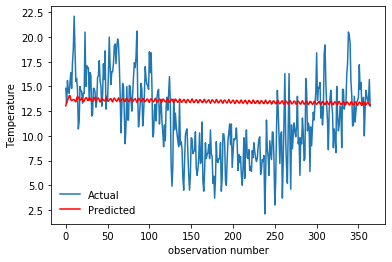

In [88]:
pyplot.plot(test_a["Temp"], label="Actual")
pyplot.plot(pred, color='red', label="Predicted")
pyplot.legend(loc='lower left', frameon=False)
pyplot.xlabel('observation number')
pyplot.ylabel('Temperature')

In [89]:
residuals = m_arima.resid

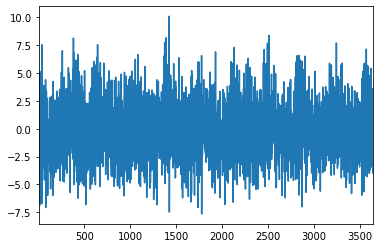

In [90]:
residuals.plot()

Seasonal ARIMA

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [92]:
df_sarima= df.copy()

In [93]:
df_sarima.index=df_sarima['Date']

In [94]:
df_sarima

,Date,Temp,t
Date,,,
1981-01-01,1981-01-01,20.7,NaN
1981-01-02,1981-01-02,17.9,20.7
1981-01-03,1981-01-03,18.8,17.9
1981-01-04,1981-01-04,14.6,18.8
1981-01-05,1981-01-05,15.8,14.6
...,...,...,...
1990-12-27,1990-12-27,14.0,14.6
1990-12-28,1990-12-28,13.6,14.0
1990-12-29,1990-12-29,13.5,13.6


In [95]:
train_sizes = int(df_sarima.shape[0]*0.9)

In [96]:
train_sizes

3285

In [97]:
train_sarima, test_sarima = df_sarima.Temp[0:train_sizes], df_sarima.Temp[train_sizes:]

In [99]:
"""
data = train_sarima
predict_sarima =[]
for t in test_sarima:
    #model_arima = ARIMA(data, order=(9,1,10))
    model = SARIMAX(train_sarima, order=(9,1,10), seasonal_order=(1,1,1,12))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y)
    predict_sarima.append(y)
    data = np.append(data, t)
    data = pd.Series(data)
    
"""


'\ndata = train_sarima\npredict_sarima =[]\nfor t in test_sarima:\n    #model_arima = ARIMA(data, order=(9,1,10))\n    model = SARIMAX(train_sarima, order=(9,1,10), seasonal_order=(1,1,1,12))\n    model_fit = model.fit()\n    y = model_fit.forecast()\n    print(y)\n    predict_sarima.append(y)\n    data = np.append(data, t)\n    data = pd.Series(data)\n    \n'

In [100]:
model = SARIMAX(train_sarima, order=(9,1,10), seasonal_order=(1,1,1,12))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [101]:
model_sarima=model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
forecast_s=model_sarima.forecast(len(test_sarima))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [104]:
fore=forecast_s.reset_index()

In [105]:
fore.drop(["index"],axis=1,inplace=True)

In [106]:
fore

,0
0,12.848868
1,13.150116
2,13.428241
3,13.449686
4,13.403741
...,...
360,13.041168
361,12.949420
362,13.027402
363,13.034456


In [107]:
test__=test_sarima.reset_index()

In [108]:
test__.drop(["Date"],axis=1, inplace=True)

In [109]:
test__

,Temp
0,14.8
1,13.3
2,15.6
3,14.5
4,14.3
...,...
360,14.0
361,13.6
362,13.5
363,15.7


In [110]:
mae_s = mean_absolute_error(test_sarima,forecast_s)
mae_s

3.3885578958583236

Text(0, 0.5, 'Temperature')

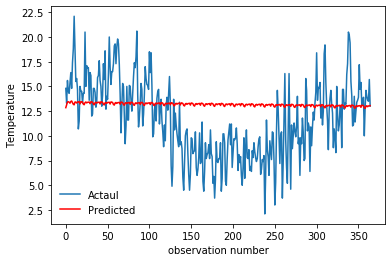

In [111]:
pyplot.plot(test__["Temp"], label= "Actaul")
pyplot.plot(fore, color='red', label= "Predicted")
pyplot.legend(loc='lower left', frameon=False)
pyplot.xlabel('observation number')
pyplot.ylabel('Temperature')

Artificial Nural Network

In [112]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [113]:
df_ann.head(20)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


Date time features

In [114]:
df_ann['year'] = df_ann['Date'].dt.year

In [115]:
df_ann['month'] = df_ann['Date'].dt.month

In [116]:
df_ann['day'] = df_ann['Date'].dt.day

In [117]:
df_ann["weekofyear"]=df_ann['Date'].dt.weekofyear

lag features 

In [118]:
df_ann['lag2']= df_ann['Temp'].shift(2)
df_ann['lag1']= df_ann['Temp'].shift(1)

window features

In [119]:
df_ann['meanofweek'] = df_ann['Temp'].rolling(window = 7).mean()

In [120]:
df_ann['minofweek'] = df_ann['Temp'].rolling(window = 7).min()

In [121]:
df_ann['mintilldate'] = df_ann['Temp'].expanding().min()

In [122]:
df_ann=df_ann[6:]

In [123]:
train_size = int(df_ann.shape[0]*0.9)

In [124]:
train_size

3279

In [125]:
train, test = df_ann[0:train_size], df_ann[train_size:]

In [126]:
train=train.drop('Date',axis=1)
test=test.drop('Date',axis=1)

In [127]:
train

,Temp,year,month,day,weekofyear,lag2,lag1,meanofweek,minofweek,mintilldate
6,15.8,1981,1,7,2,15.8,15.8,17.057143,14.6,14.6
7,17.4,1981,1,8,2,15.8,15.8,16.585714,14.6,14.6
8,21.8,1981,1,9,2,15.8,17.4,17.142857,14.6,14.6
9,20.0,1981,1,10,2,17.4,21.8,17.314286,14.6,14.6
10,16.2,1981,1,11,2,21.8,20.0,17.542857,15.8,14.6
...,...,...,...,...,...,...,...,...,...,...
3280,13.3,1989,12,27,52,16.4,16.0,13.500000,11.8,0.0
3281,11.7,1989,12,28,52,16.0,13.3,13.414286,11.7,0.0
3282,10.4,1989,12,29,52,13.3,11.7,13.214286,10.4,0.0
3283,14.4,1989,12,30,52,11.7,10.4,13.557143,10.4,0.0


In [128]:
x_train= train.drop('Temp', axis=1).copy()

In [129]:
x_train

,year,month,day,weekofyear,lag2,lag1,meanofweek,minofweek,mintilldate
6,1981,1,7,2,15.8,15.8,17.057143,14.6,14.6
7,1981,1,8,2,15.8,15.8,16.585714,14.6,14.6
8,1981,1,9,2,15.8,17.4,17.142857,14.6,14.6
9,1981,1,10,2,17.4,21.8,17.314286,14.6,14.6
10,1981,1,11,2,21.8,20.0,17.542857,15.8,14.6
...,...,...,...,...,...,...,...,...,...
3280,1989,12,27,52,16.4,16.0,13.500000,11.8,0.0
3281,1989,12,28,52,16.0,13.3,13.414286,11.7,0.0
3282,1989,12,29,52,13.3,11.7,13.214286,10.4,0.0
3283,1989,12,30,52,11.7,10.4,13.557143,10.4,0.0


In [130]:
y_train=train['Temp']

In [131]:
y_train

6       15.8
7       17.4
8       21.8
9       20.0
10      16.2
        ... 
3280    13.3
3281    11.7
3282    10.4
3283    14.4
3284    12.7
Name: Temp, Length: 3279, dtype: float64

In [132]:
x_test=test.drop('Temp', axis=1).copy()

In [133]:
x_test

,year,month,day,weekofyear,lag2,lag1,meanofweek,minofweek,mintilldate
3285,1990,1,1,1,14.4,12.7,13.328571,10.4,0.0
3286,1990,1,2,1,12.7,14.8,12.942857,10.4,0.0
3287,1990,1,3,1,14.8,13.3,13.271429,10.4,0.0
3288,1990,1,4,1,13.3,15.6,13.671429,10.4,0.0
3289,1990,1,5,1,15.6,14.5,14.228571,12.7,0.0
...,...,...,...,...,...,...,...,...,...
3645,1990,12,27,52,12.9,14.6,13.100000,10.0,0.0
3646,1990,12,28,52,14.6,14.0,13.171429,10.0,0.0
3647,1990,12,29,52,14.0,13.6,13.214286,10.0,0.0
3648,1990,12,30,52,13.6,13.5,13.471429,10.0,0.0


In [134]:
y_test= test['Temp']

In [135]:
y_test=y_test.reset_index()

In [136]:
y_test= y_test.drop(["index"], axis=1)

In [137]:
y_test

,Temp
0,14.8
1,13.3
2,15.6
3,14.5
4,14.3
...,...
360,14.0
361,13.6
362,13.5
363,15.7


In [138]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [140]:
x_test.shape

(365, 9)

In [141]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[9]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [142]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.compile(loss="mean_squared_error", 
              optimizer='adam', 
              metrics=['mae'])

In [144]:
model_history = model.fit(x_train, y_train, epochs=35,batch_size=10, validation_data=(x_test, y_test))

Epoch 1/35
328/328 [==============================] - 0s 1ms/step - loss: 31.9394 - mae: 4.1966 - val_loss: 6.0500 - val_mae: 1.9556
Epoch 2/35
328/328 [==============================] - 0s 828us/step - loss: 6.6043 - mae: 2.0578 - val_loss: 5.3928 - val_mae: 1.8555
Epoch 3/35
328/328 [==============================] - 0s 844us/step - loss: 5.8578 - mae: 1.9399 - val_loss: 4.7892 - val_mae: 1.7393
Epoch 4/35
328/328 [==============================] - 0s 824us/step - loss: 5.5217 - mae: 1.8756 - val_loss: 5.1334 - val_mae: 1.8136
Epoch 5/35
328/328 [==============================] - 0s 857us/step - loss: 5.3504 - mae: 1.8496 - val_loss: 4.5228 - val_mae: 1.6633
Epoch 6/35
328/328 [==============================] - 0s 875us/step - loss: 5.2055 - mae: 1.8245 - val_loss: 4.4253 - val_mae: 1.6398
Epoch 7/35
328/328 [==============================] - 0s 889us/step - loss: 5.1387 - mae: 1.8099 - val_loss: 4.4121 - val_mae: 1.6343
Epoch 8/35
328/328 [==============================] - 0s 823us/

In [146]:
plot_df=pd.DataFrame(model_history.history)
plot_df

,loss,mae,val_loss,val_mae
0,31.939415,4.196594,6.049994,1.955593
1,6.604294,2.057801,5.392776,1.855530
2,5.857826,1.939863,4.789193,1.739264
3,5.521749,1.875626,5.133397,1.813636
4,5.350443,1.849574,4.522812,1.663334
5,5.205480,1.824492,4.425317,1.639805
6,5.138732,1.809914,4.412148,1.634295
7,5.083733,1.802931,4.535244,1.663166
8,5.033359,1.794432,4.848240,1.724151
9,4.993606,1.780949,4.181095,1.588791


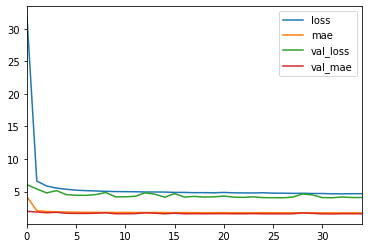

In [147]:
plot_df.plot()

In [148]:
testPredict = model.predict(x_test)

Text(0, 0.5, 'Temperature')

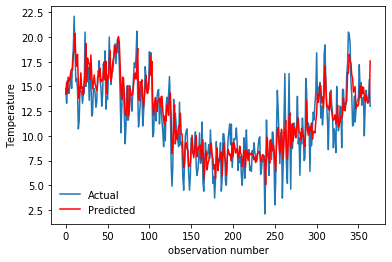

In [150]:
pyplot.plot(y_test,label= "Actual")
pyplot.plot(testPredict, color='red',label="Predicted")
pyplot.legend(loc='lower left', frameon=False)
pyplot.xlabel('observation number')
pyplot.ylabel('Temperature')